# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset ini adalah simulasi sintetik respons survei kesehatan mental dari 10.000 individu di berbagai negara dan lingkungan kerja.
   - Sumber: Kaggle Mahdi Mashayekhi: "Mental Health Survey Simulation" (https://www.kaggle.com/datasets/mahdimashayekhi/mental-health)
   - Konten: Demografi (age, gender, employment_status, work_environment), riwayat kesehatan mental, tingkat stres, skor depresi/anxiety, dukungan social, produktivitas, dan risiko kesehatan mental.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # digunakan untuk plot (opsional)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [25]:
DATA_PATH = '../mental_health_dataset.csv'
df = pd.read_csv(DATA_PATH)

In [26]:
# Tampilkan 5 baris pertama untuk validasi
print(df.shape)
df.head()

(10000, 14)


,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [27]:
# 4.1 Cek tipe data, missing, dan statistik umum
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

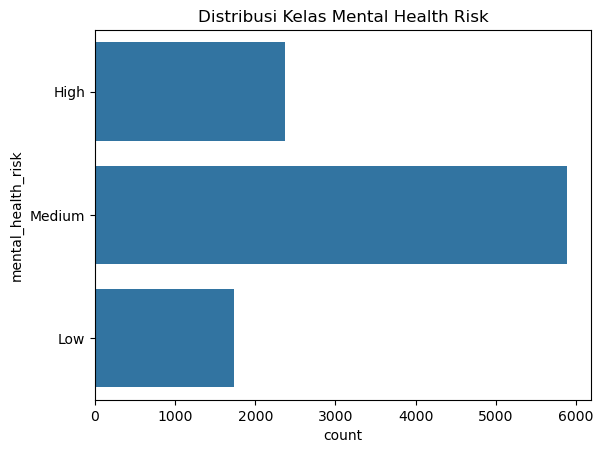

In [28]:
# 4.2 Distribusi target 'mental_health_risk'
sns.countplot(y='mental_health_risk', data=df)
plt.title('Distribusi Kelas Mental Health Risk')
plt.show()

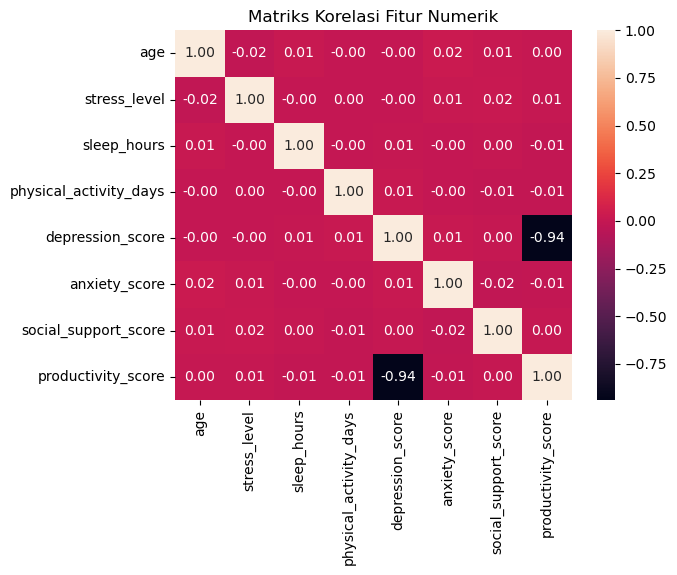

In [29]:
# 4.3 Korelasi numerik
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

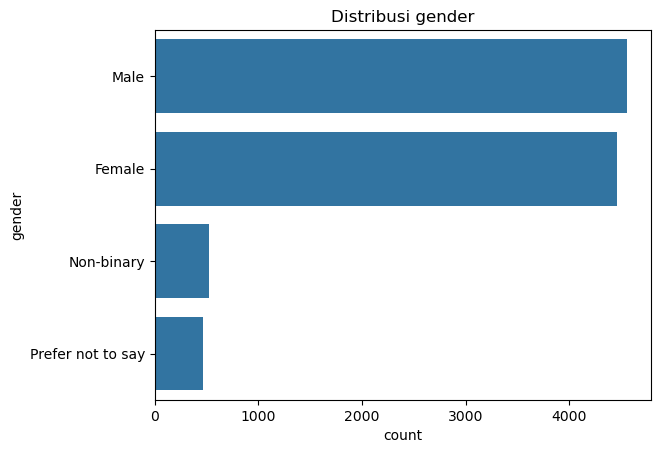

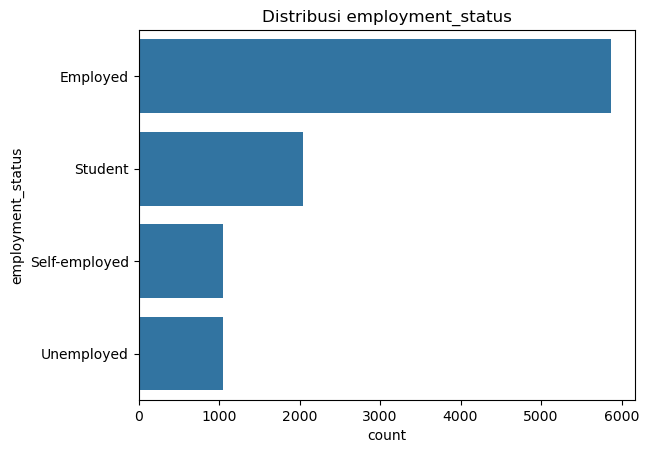

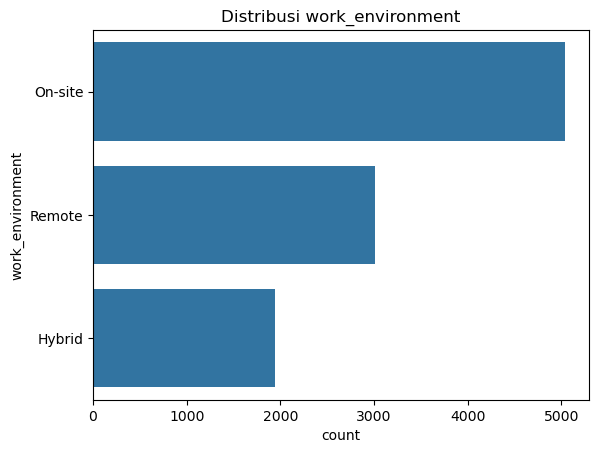

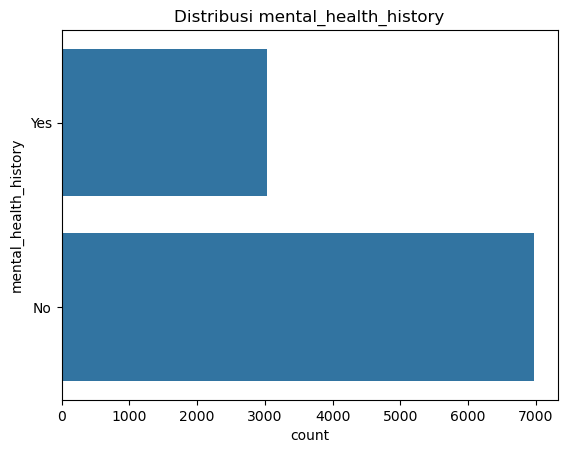

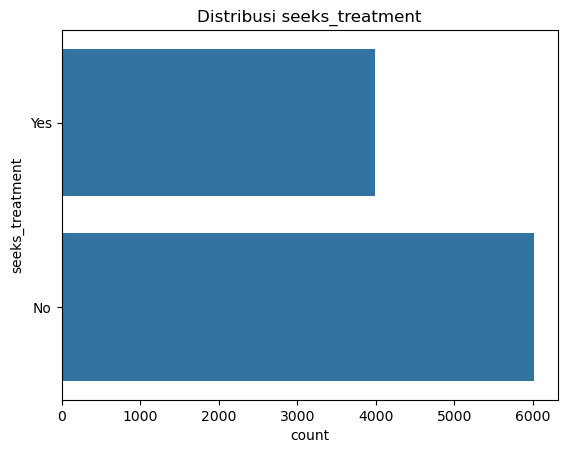

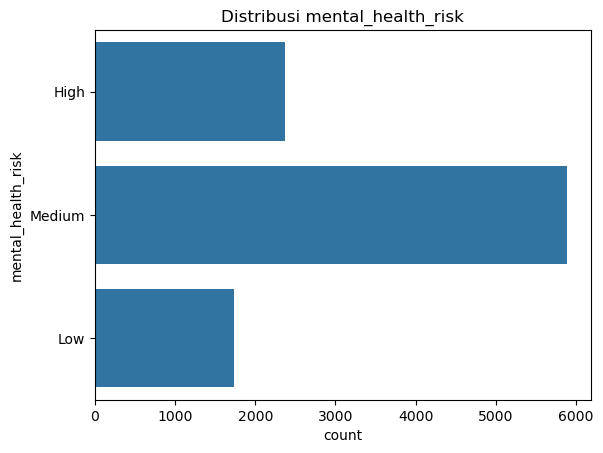

In [30]:
# 4.4 Analisis fitur kategorikal
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    plt.figure()
    sns.countplot(y=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [31]:
# 5.1 Identifikasi kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Hapus kolom target dari daftar numerik
if 'mental_health_risk' in num_cols:
    num_cols.remove('mental_health_risk')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Jika target termasuk di category, hapus
if 'mental_health_risk' in cat_cols:
    cat_cols.remove('mental_health_risk')

In [33]:
# 5.2 Build pipeline untuk numerik dan kategorikal
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

processor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

In [34]:
# 5.3 Pisahkan fitur dan target, kemudian split data
y = df['mental_health_risk']
X = df.drop(columns=['mental_health_risk'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# 5.4 Terapkan preprocessing
X_train_proc = processor.fit_transform(X_train)
X_test_proc = processor.transform(X_test)
print(f'X_train shape: {X_train_proc.shape}')
print(f'X_test shape: {X_test_proc.shape}')

X_train shape: (8000, 23)
X_test shape: (2000, 23)


In [38]:
# ## 5.5 Export Preprocessed Dataset (Train & Test Terpisah)
# Buat folder untuk menyimpan file hasil preprocessing
output_dir = './mental_health_dataset_preprocessing'
os.makedirs(output_dir, exist_ok=True)

# Siapkan DataFrame untuk train
feature_names = processor.get_feature_names_out()
train_df = pd.DataFrame(X_train_proc, columns=feature_names)
train_df['mental_health_risk'] = y_train.values
train_path = os.path.join(output_dir, 'mental_health_train_preprocessed.csv')
train_df.to_csv(train_path, index=False)

# Siapkan DataFrame untuk test
test_df = pd.DataFrame(X_test_proc, columns=feature_names)
test_df['mental_health_risk'] = y_test.values
test_path = os.path.join(output_dir, 'mental_health_test_preprocessed.csv')
test_df.to_csv(test_path, index=False)

print(f"Export selesai: '{train_path}' & '{test_path}'")

Export selesai: './mental_health_dataset_preprocessing\mental_health_train_preprocessed.csv' & './mental_health_dataset_preprocessing\mental_health_test_preprocessed.csv'


### → Tahap preprocessing lengkap. Berikutnya: model building, MLflow, dan deployment MLOps pipeline.